In [19]:
import numpy as np
import pandas as pd

## Virtualization
import matplotlib.pyplot as plt
import seaborn as sns
# ## res settings
import matplotlib as mpl
mpl.rcParams['figure.dpi']= 300
mpl.rcParams['font.family'] = 'Times New Roman'
mpl.rcParams['font.size'] = 10
import warnings
warnings.filterwarnings('ignore')

import matplotlib.patheffects as PathEffects

In [20]:
data = pd.read_pickle("dataset.data")

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3554 entries, 0 to 3516
Data columns (total 4 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Lithology                     3554 non-null   object 
 1   Porosity                      3554 non-null   float64
 2   Formation Resistivity Factor  3554 non-null   float64
 3   EQI                           3554 non-null   float64
dtypes: float64(3), object(1)
memory usage: 138.8+ KB


In [22]:
# Lithology data type should be Category
data['Lithology'] = pd.Categorical(data['Lithology'])

In [23]:
data.describe()

,Porosity,Formation Resistivity Factor,EQI
count,3554.000000,3554.000000,3554.000000
mean,0.119797,125.325679,0.335232
std,0.060791,106.837173,0.109413
min,0.023121,5.791307,0.103618
25%,0.073469,54.611822,0.257040
50%,0.100288,97.655899,0.317187
75%,0.157129,162.884188,0.408588
max,0.453092,1603.522546,0.846085


In [51]:
data.groupby(['Lithology']).describe().T

Lithology                             carbonate    sandstone
Porosity                     count  2193.000000  1361.000000
                             mean      0.134086     0.096772
                             std       0.068971     0.033583
                             min       0.023121     0.037732
                             25%       0.072507     0.074295
                             50%       0.123294     0.087780
                             75%       0.182938     0.111602
                             max       0.453092     0.279581
Formation Resistivity Factor count  2193.000000  1361.000000
                             mean    129.887629   117.974939
                             std     111.261184    98.892874
                             min       5.791307     8.650383
                             25%      58.226768    48.735032
                             50%     100.744432    92.639326
                             75%     167.948049   156.532076
                             max    1603.522546   743.425908
EQI                          count  2193.000000  1361.000000
                             mean      0.313402     0.370407
                             std       0.106219     0.105279
                             min       0.103618     0.170489
                             25%       0.236465     0.282427
                             50%       0.301322     0.349365
                             75%       0.371760     0.451971
                             max       0.846085     0.697036

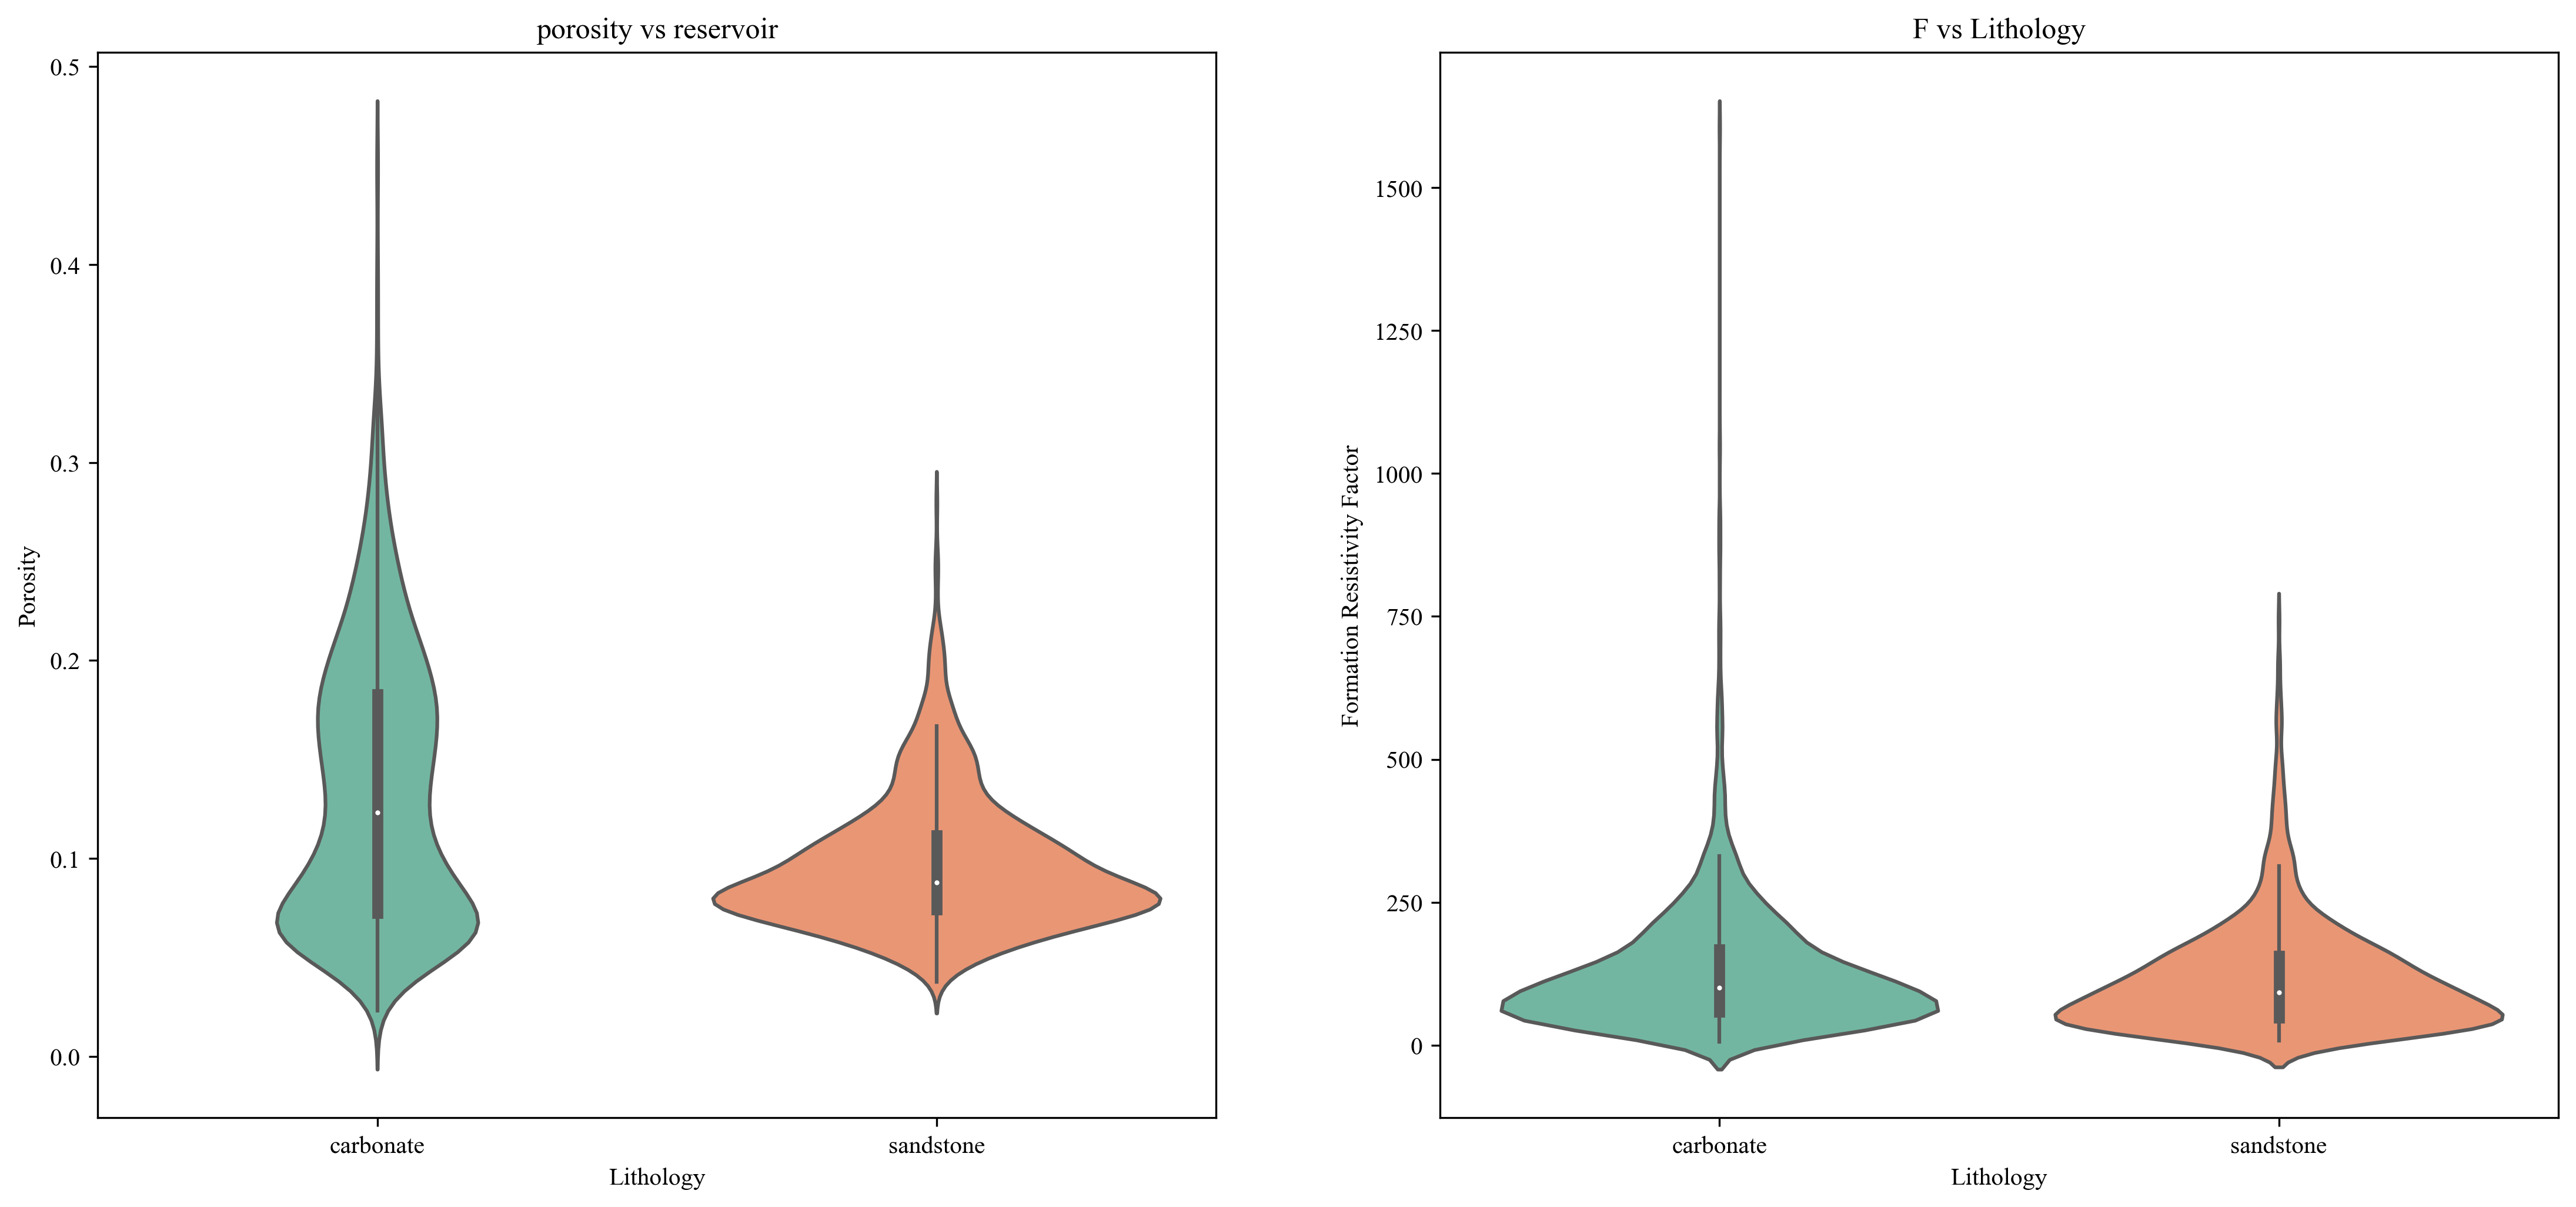

In [29]:
f,ax=plt.subplots(1,2,figsize=(18,8))
sns.violinplot(x='Lithology',y='Porosity', data=data, palette="Set2", split=True, ax=ax[0])
ax[0].set_title('porosity vs reservoir')
sns.violinplot(x='Lithology',y='Formation Resistivity Factor', data=data, palette="Set2", split=True, ax=ax[1])
ax[1].set_title('F vs Lithology')
plt.show()

Text(117.97493911252384, 0.006, 'Average Formation Resistivity Factor of Sandstones : 117.975')

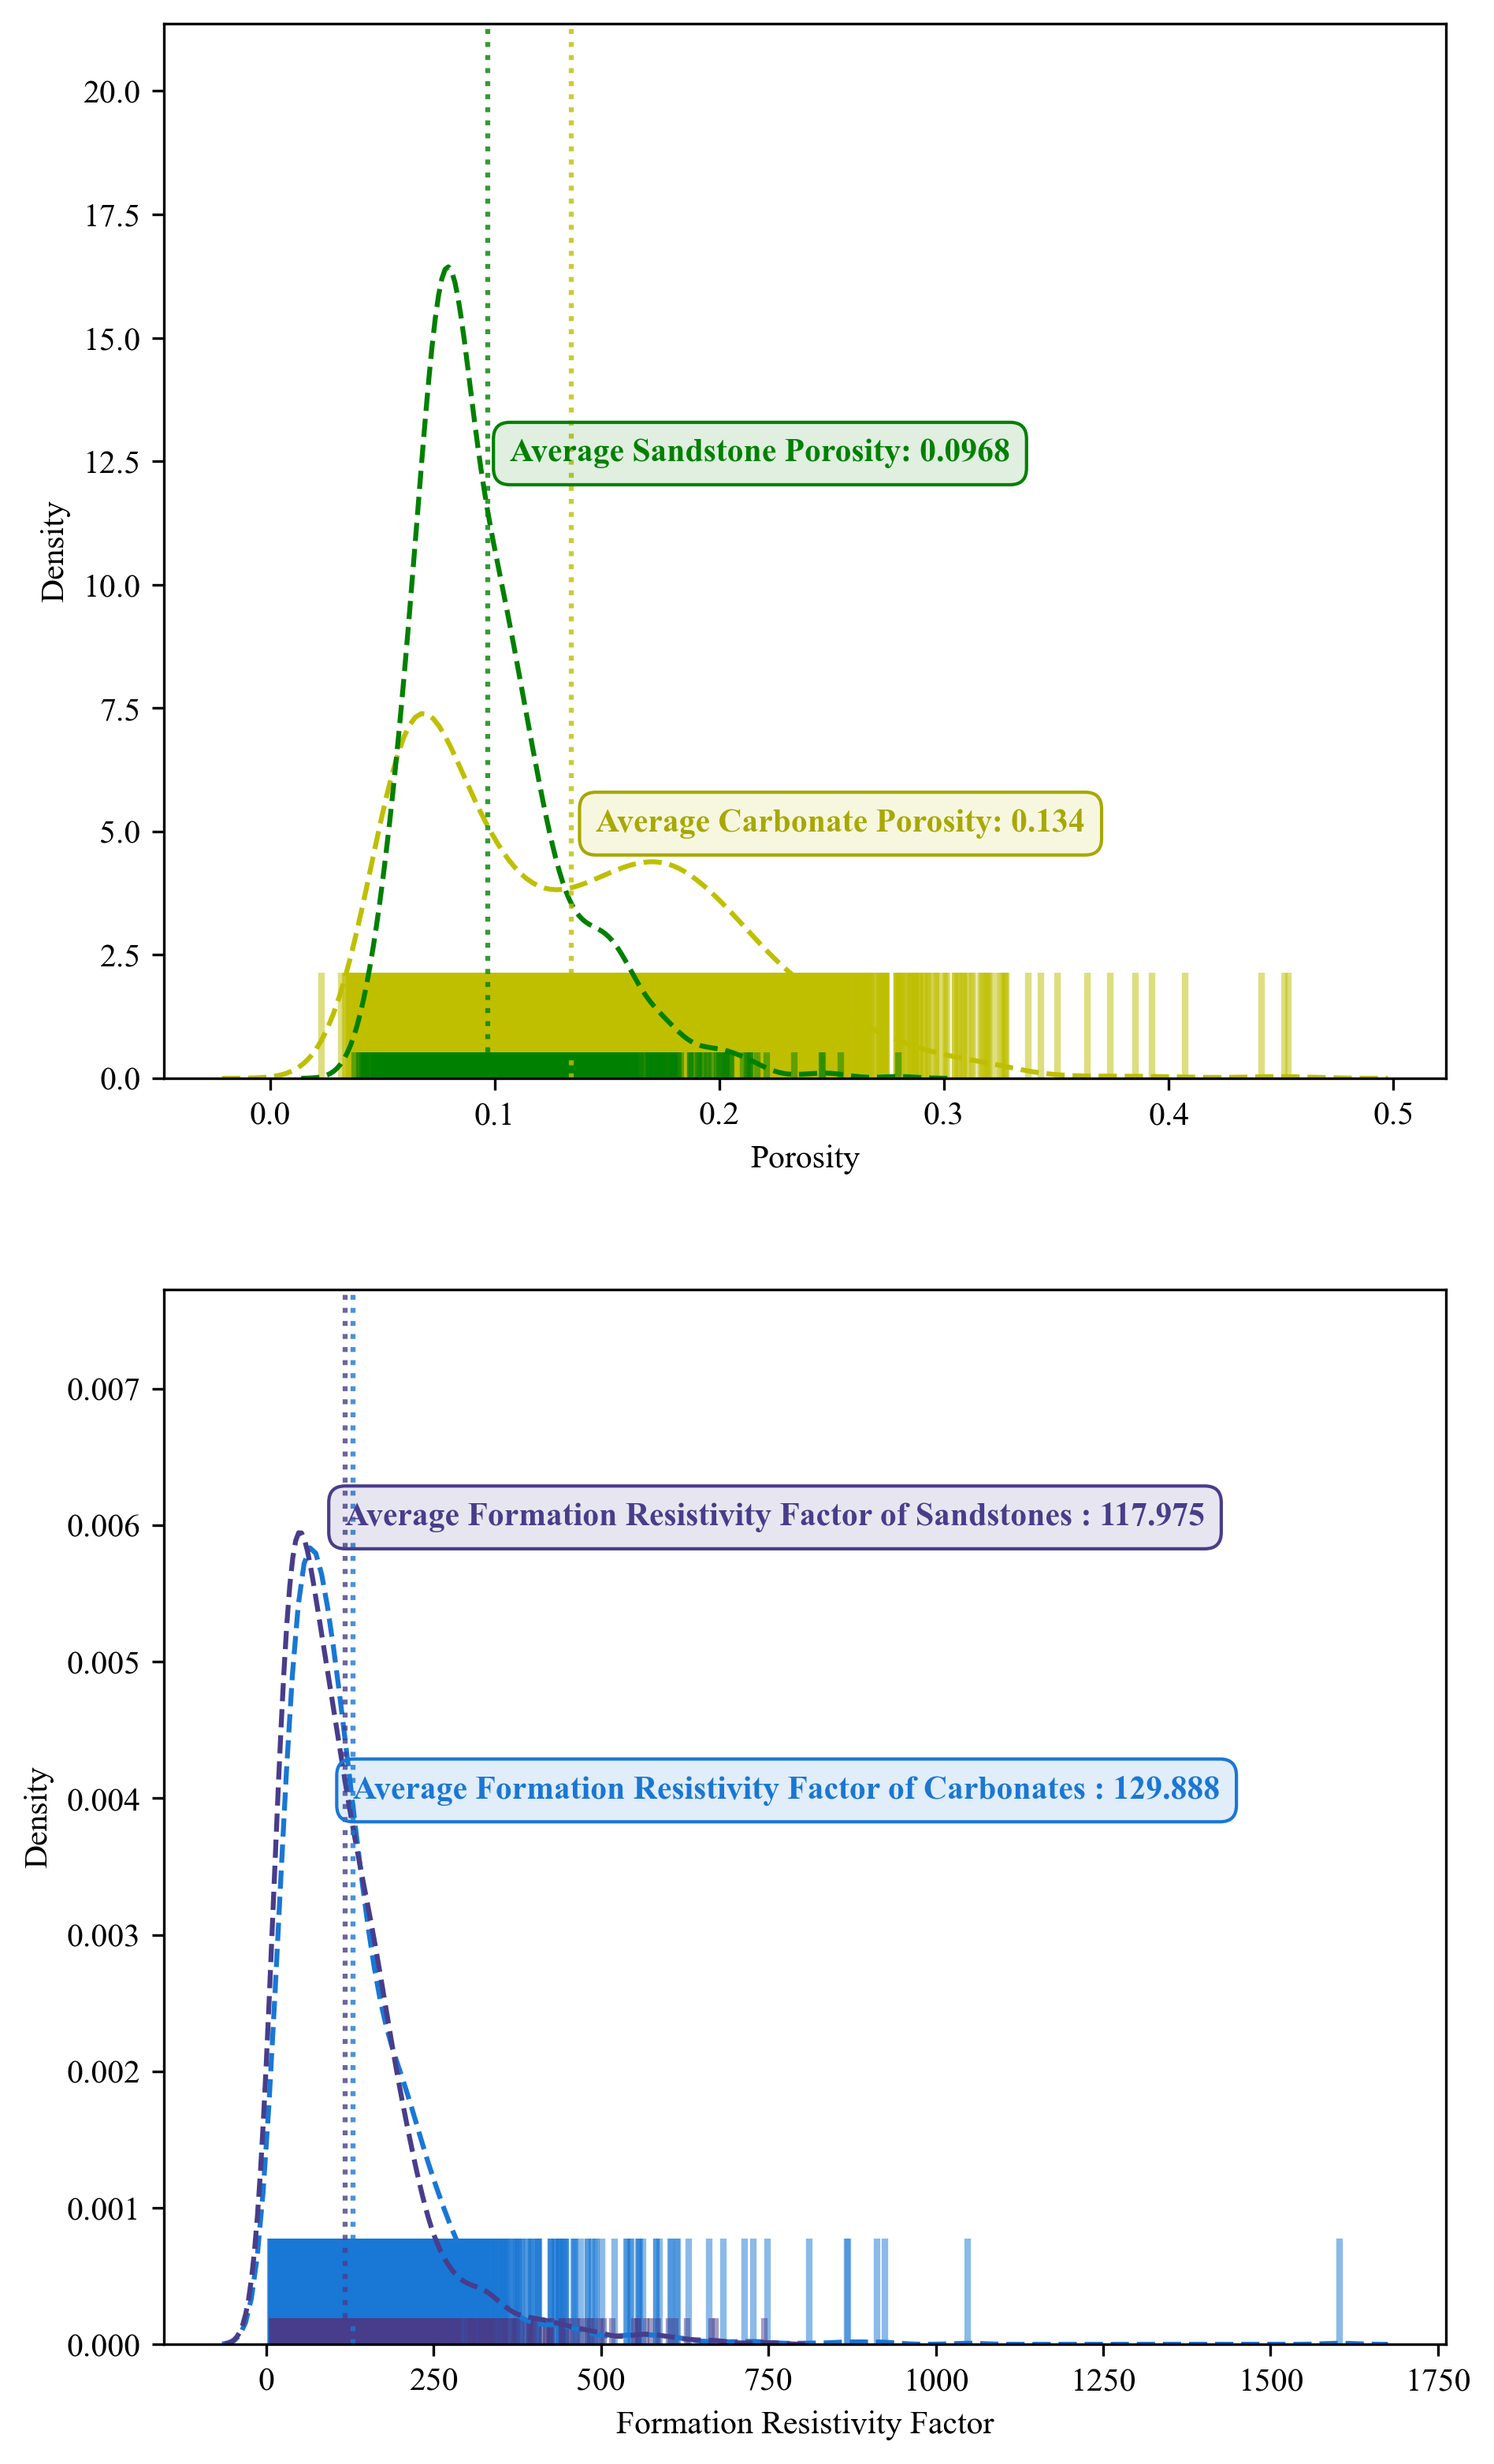

In [50]:
sandPoroAvg = data.groupby(['Lithology']).describe()['Porosity']['mean'][1]
carbPoroAvg = data.groupby(['Lithology']).describe()['Porosity']['mean'][0]
sandFAvg = data.groupby(['Lithology']).describe()['Formation Resistivity Factor']['mean'][1]
carbFAvg = data.groupby(['Lithology']).describe()['Formation Resistivity Factor']['mean'][0]

f= plt.figure(figsize=(7,13))
ax=f.add_subplot(211)
sns.distplot(data[data['Lithology'] == 'carbonate']['Porosity'],hist = False,kde = True,rug = True,
                           rug_kws= {'color': 'y', 'lw': 2, 'alpha': 0.5, 'height': 0.1} , 
                           kde_kws={"color": "y", "lw": 1.5, 'linestyle':'--'}, label = 'Carbonate')


sns.distplot(data[data['Lithology'] == 'sandstone']['Porosity'],hist = False,bins=6,kde = True,rug = True,
             rug_kws = {'color':'g','lw':2,'alpha':0.5} , 
             kde_kws={"color": "g", "lw": 1.5, 'linestyle':'--'},label = 'Sandstone')


plt.axvline(carbPoroAvg,color='y',linestyle=":",alpha=0.8) 
plt.text(carbPoroAvg + 0.011, 5, s=f'Average Carbonate Porosity: {carbPoroAvg:.3}', color = '#a8a800', fontweight='bold',
         bbox=dict(facecolor='#bfbf001f', edgecolor='#a8a800', boxstyle='round',pad=.5))

plt.axvline(sandPoroAvg ,color='g',linestyle=":",alpha=0.8)
plt.text(sandPoroAvg + 0.01, 12.5,s=f'Average Sandstone Porosity: {sandPoroAvg:.3}', color = 'g', fontweight='bold',
         bbox=dict(facecolor='#037d031f', edgecolor='g', boxstyle='round',pad=.5))


# ############################################################################################

ax=f.add_subplot(212)
sns.distplot(data[data['Lithology'] == 'carbonate']['Formation Resistivity Factor'],hist = False,kde = True,rug = True,
                           rug_kws= {'color': '#1977d5', 'lw': 2, 'alpha': 0.5, 'height': 0.1} , # Set the data frequency distribution color # Control whether to display the small strips of observation (marginal blanket)
                           kde_kws={"color": "#1977d5", "lw": 1.5, 'linestyle':'--'}, # Set the density curve color, line width, label, line shape, #Control whether to display the nuclear density estimation map
             label = 'Carbonate')


sns.distplot(data[data['Lithology'] == 'sandstone']['Formation Resistivity Factor'],hist = False,bins=6,kde = True,rug = True,
             rug_kws = {'color':'darkslateblue','lw':2,'alpha':0.5} , 
             kde_kws={"color": "darkslateblue", "lw": 1.5, 'linestyle':'--'},
             label = 'Sandstone')

plt.axvline(carbFAvg,color='#1977d5',linestyle=":",alpha=0.8) 
plt.text(carbFAvg, 0.004, s=f'Average Formation Resistivity Factor of Carbonates : {carbFAvg:.6}', color = '#1977d5', fontweight='bold',
         bbox=dict(facecolor='#1977d521', edgecolor='#1977d5', boxstyle='round',pad=.5))

plt.axvline(sandFAvg ,color='darkslateblue',linestyle=":",alpha=0.8)
plt.text(sandFAvg,0.006, s=f'Average Formation Resistivity Factor of Sandstones : {sandFAvg:.6}', color = 'darkslateblue', fontweight='bold',
         bbox=dict(facecolor='#493f8c21', edgecolor='darkslateblue', boxstyle='round',pad=.5))



Text(0.5, 1.0, '(b)')

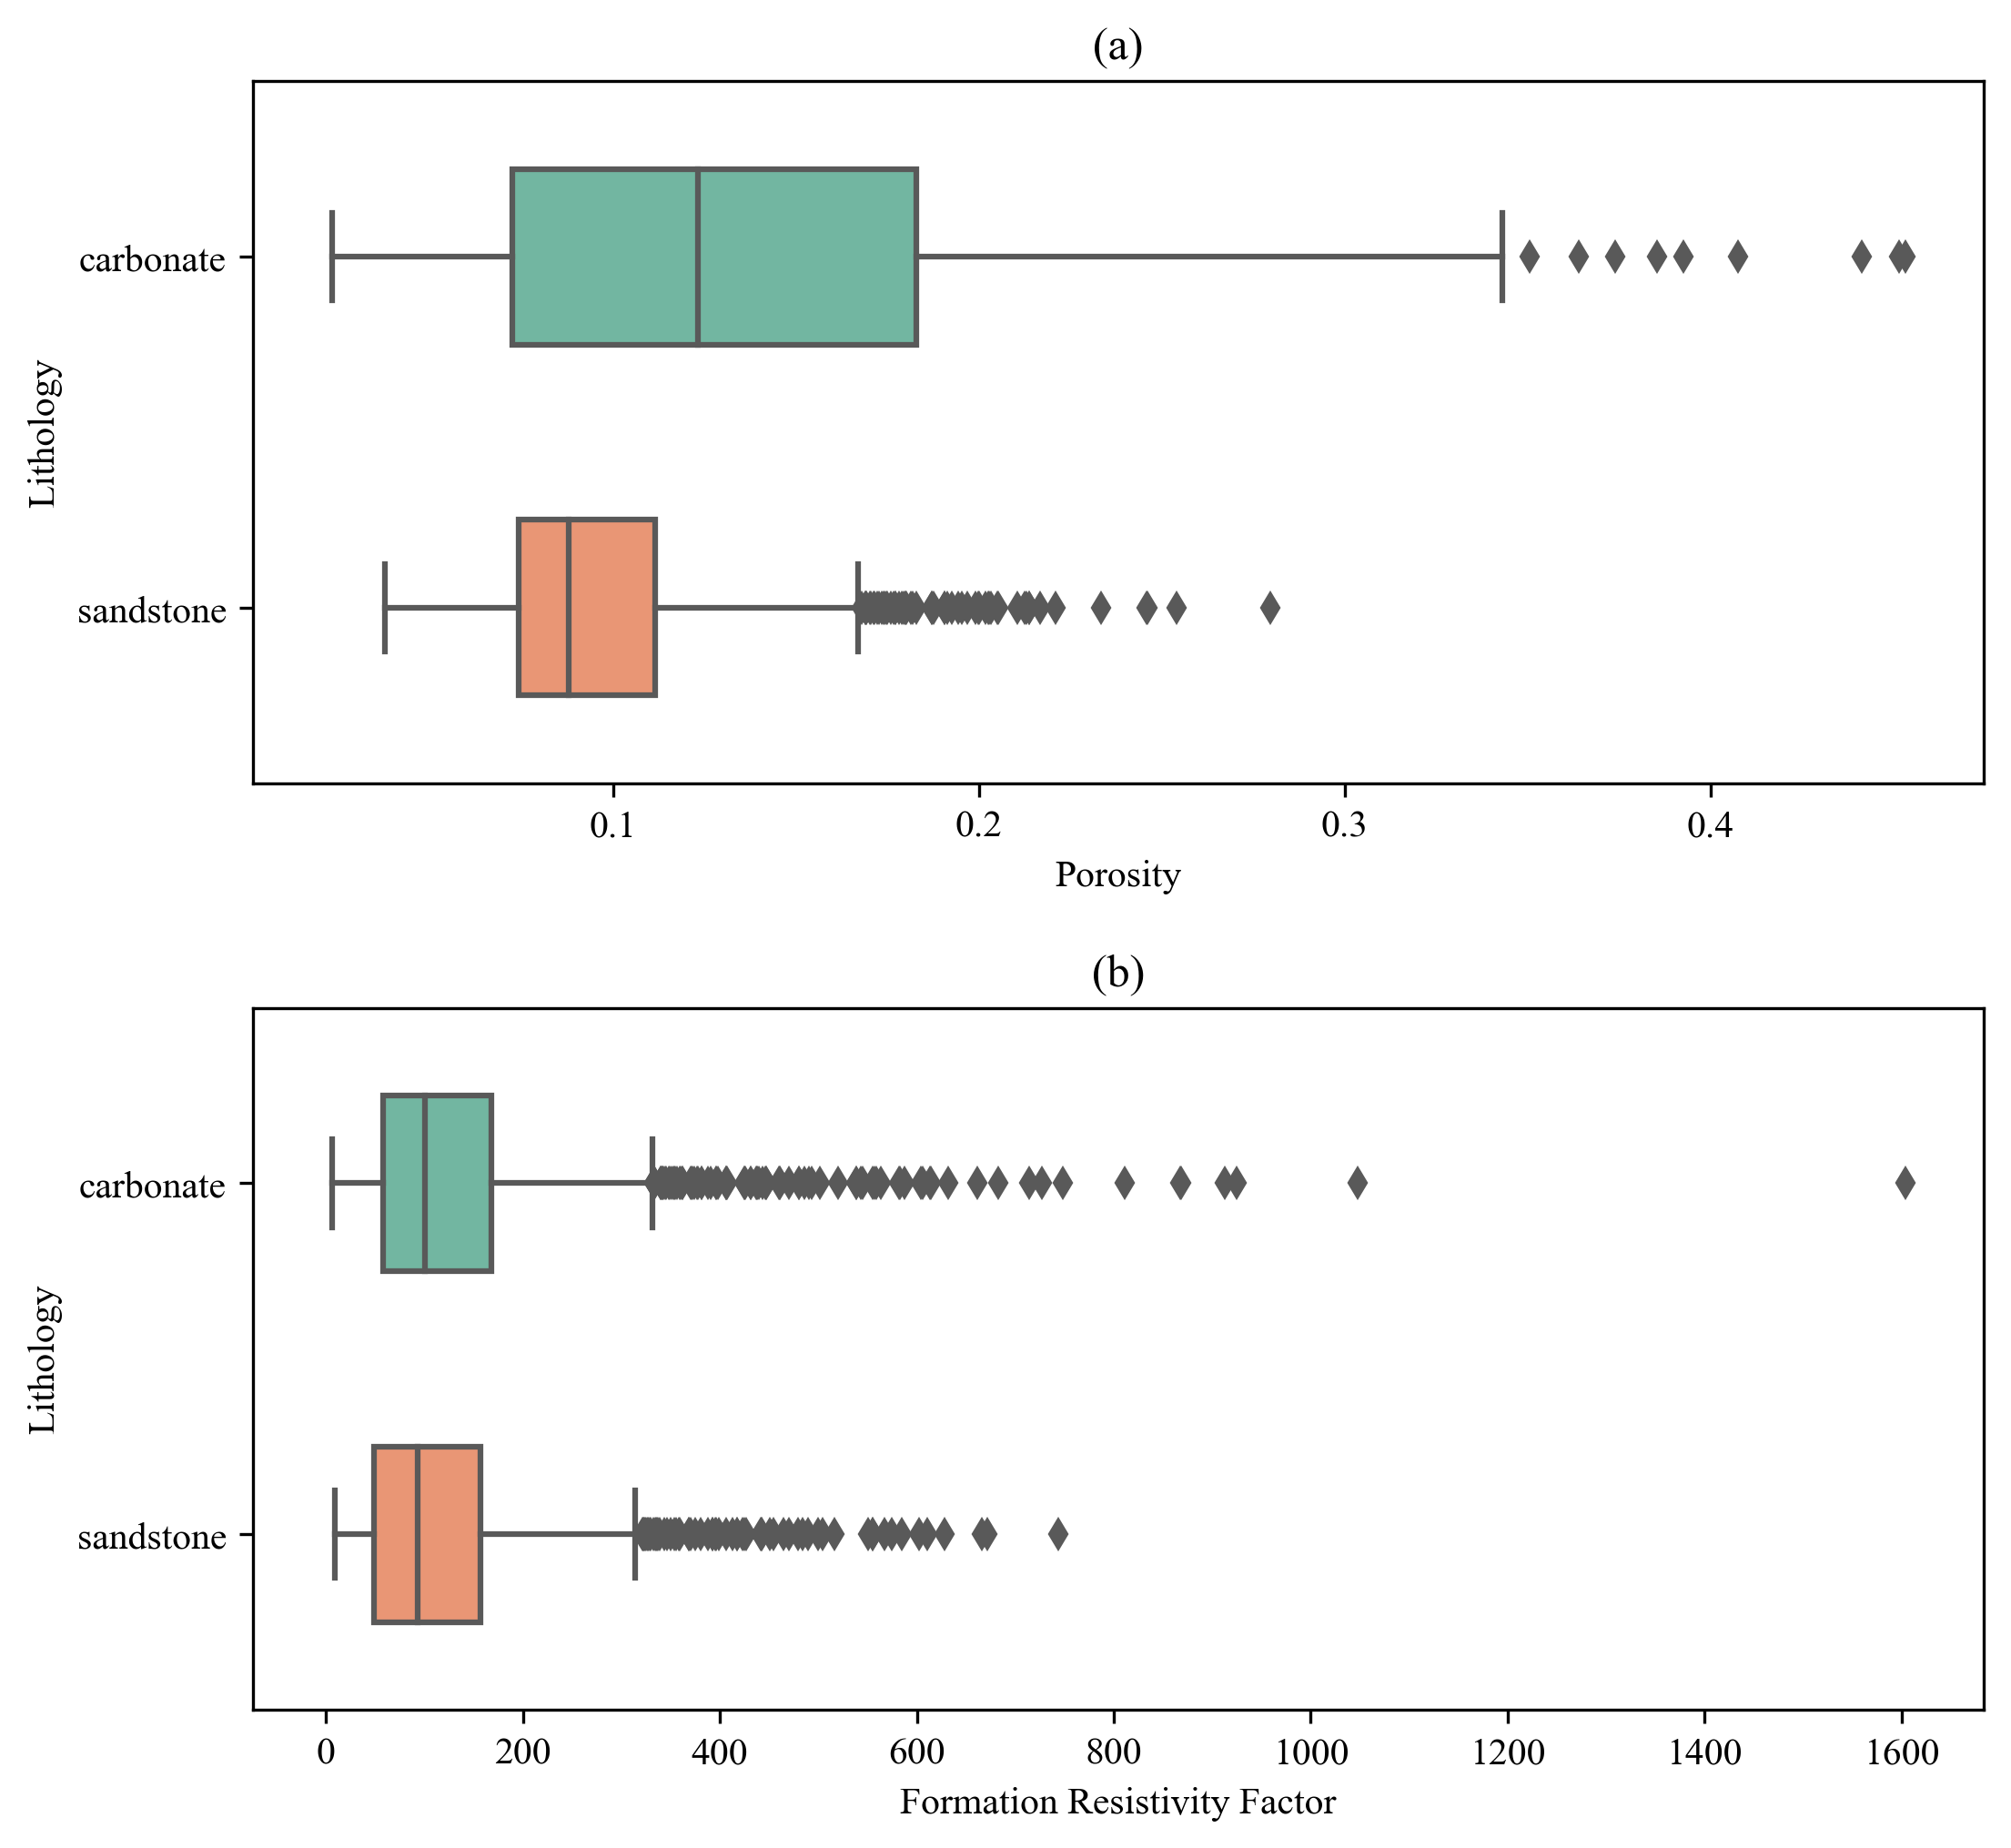

In [48]:
sns.set_palette(sns.color_palette('Set2',3))
f= plt.figure(figsize=(8,7))

ax1=f.add_subplot(211)
sns.boxplot(data=data,
                y = 'Lithology',
                x = 'Porosity',
                order = sorted(data.Lithology.unique()),
                orient="h",
                width=0.5
                )
ax1.set_title('(a)')
f.tight_layout(pad=3)
ax2=f.add_subplot(212)
sns.boxplot(data=data,
                y = 'Lithology',
                x = 'Formation Resistivity Factor',
                order = sorted(data.Lithology.unique()),
                orient="h", width=0.5)
ax2.set_title('(b)')
